In [1]:
from manim import *
from manim_voiceover import VoiceoverScene
from manim_voiceover.services.gtts import GTTSService
import copy

Manim Community v0.17.3

/Users/mnica/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
##### HELPER FUNCTIONS

COLOR_LIST = [GREY_D,BLUE_B,YELLOW,TEAL_E,RED] # [GREY_D,BLUE,RED,PURPLE,GREEN] #GREEN,YELLOW,PURPLE,TEAL]
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,YELLOW,GREEN_D,RED]


def LabeledTriangle(label='.',my_scale=1,**triangle_args):
    tri = Triangle(**triangle_args).scale(my_scale)
    text = MathTex(label)
    text.set_x(tri.get_x())
    if len(label)==1:
        text.height = tri.height/2
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.21*UP)
    if len(label)==2:
        text.height = tri.height/2.5
        text.align_to(tri,DOWN)
        text.shift(my_scale*0.15*UP)
        
    tri.set_z_index(-1)
    tri.set_fill(COLOR_LIST[0],opacity=1.0) #set it to the "0" color by default
    if label == '.':
        text.set_opacity(0.0)
        
    return VGroup(tri,text)
    
def generate_pascals_triangle(num_rows,mod_k=None):
    #generates num_rows of pascals triangle as a numpy array.
    # if mod_k is not None, will return mod k of each row
    pascal_t = np.zeros((num_rows, num_rows), dtype=int)
    pascal_t[0,0] = 1
    for i in range(num_rows-1):
        if mod_k:
            pascal_t[i+1,:] =np.mod( pascal_t[i,:] + np.roll(pascal_t[i,:],1) , mod_k)
        else:
            pascal_t[i+1,:] = pascal_t[i,:] + np.roll(pascal_t[i,:],1)
    return pascal_t


TRI = [LabeledTriangle(str(i),color=WHITE,stroke_width=0).scale(0.8) for i in range(25)]

EMPTY_TRI = LabeledTriangle('.',color=WHITE,stroke_width=0).scale(0.8) #VGroup([Triangle(color=WHITE,stroke_width=0).scale(0.8),None])
DELAY = 0.1




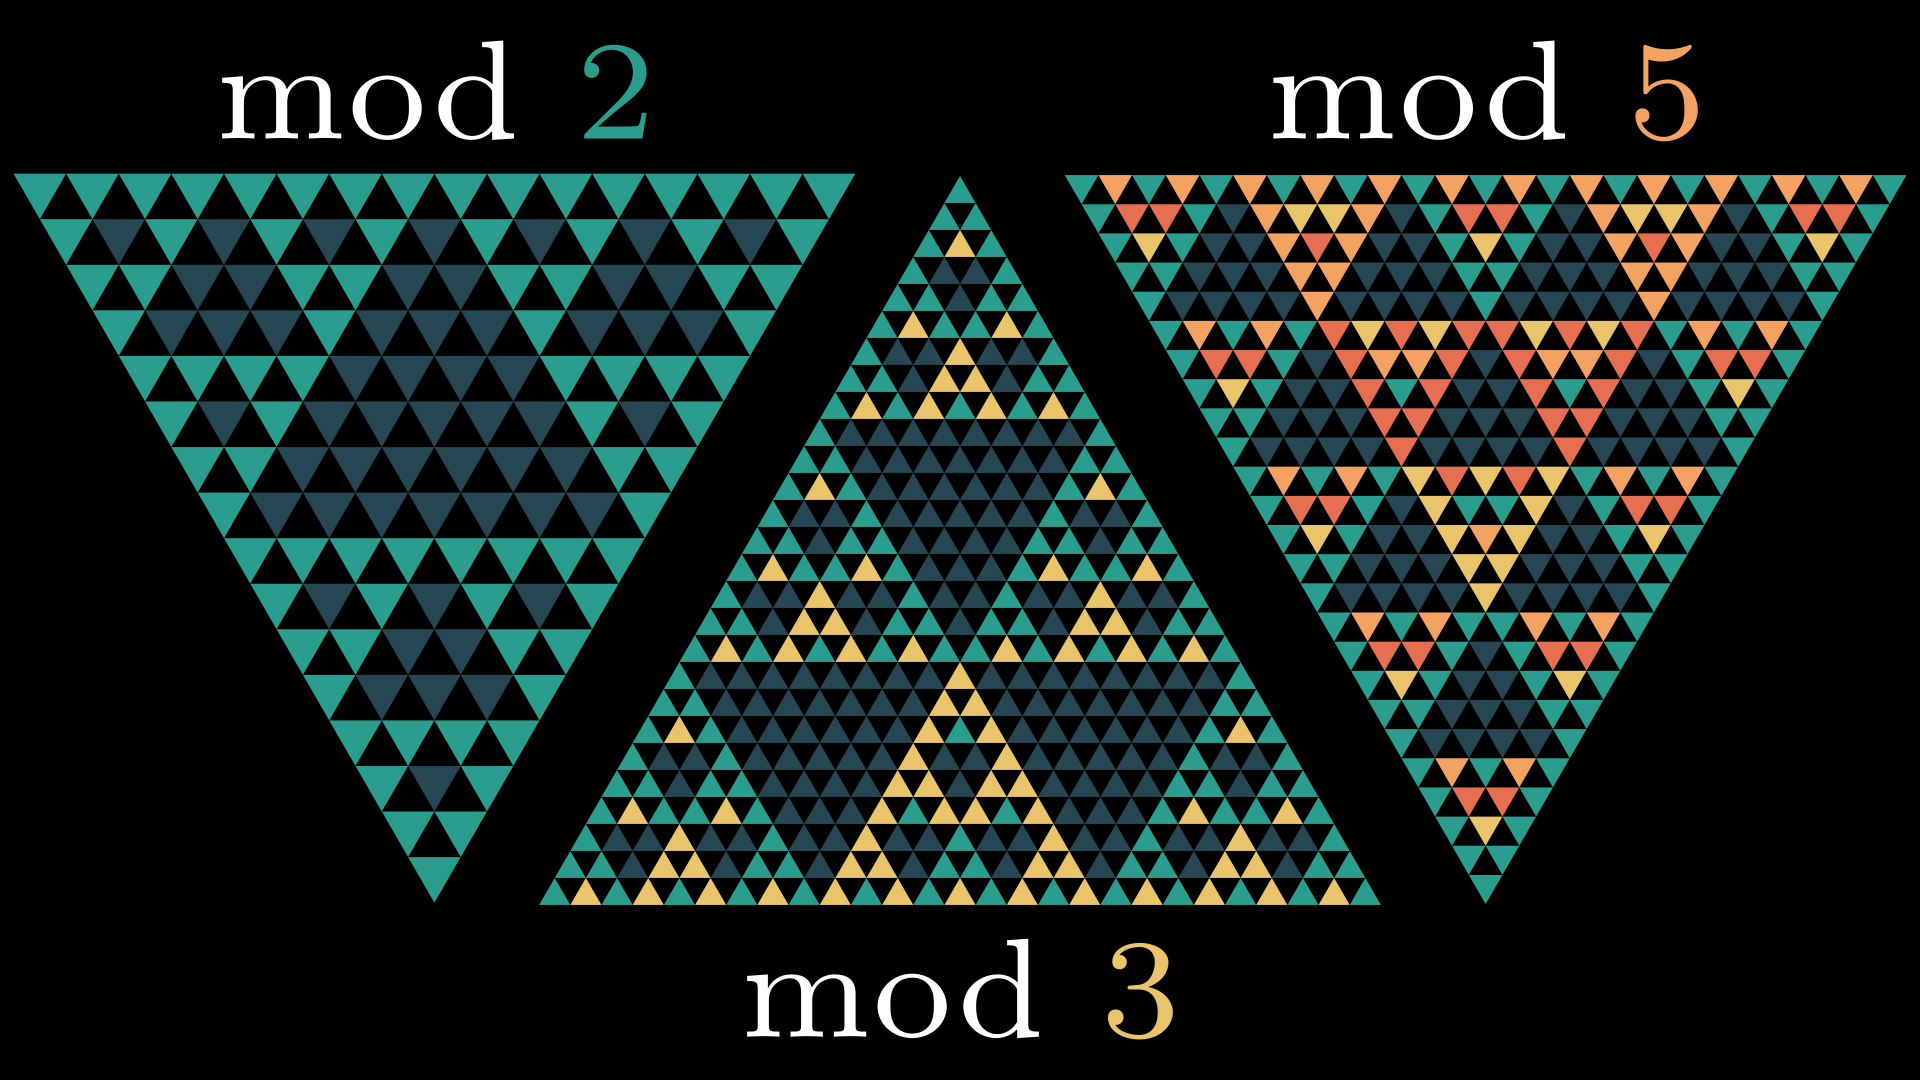

In [3]:
%%manim -qh -v CRITICAL thumb
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,RED_B,PURPLE_B,GREEN_B]
#THUMB_COLOR_LIST = [GREY_D,BLUE_B,YELLOW,PURPLE,RED]

THUMB_COLOR_LIST = ['#264653','#2A9D8F','#E9C46A','#E76F51','#F4A261']

class thumb(Scene):
    def construct(self):
        labels = True
        ####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
        
        p_vals = [2,3,5]
        my_color_list = [THUMB_COLOR_LIST[1],THUMB_COLOR_LIST[2],THUMB_COLOR_LIST[-1]]
        my_n_rows = [16,27,25] #[2*2**3,2*3**2,2*5**1] #the places to zoom out to in the opening scene

        n_rows = max(my_n_rows) 

        P_val = generate_pascals_triangle(n_rows+1)
        
        P_val_5 = generate_pascals_triangle(n_rows+1, mod_k=5)
        #P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows

        #setup one copy which is P
        P = [[None for i in range(n_rows)] for j in range(n_rows)]
        P[0][0] = VGroup(Triangle(color=WHITE,stroke_width=0).scale(0.8))
        P[0][0].to_edge(UP)

        w = P[0][0].width
        h = P[0][0].height
        x_init = P[0][0].get_x()
        y_init = P[0][0].get_y()

        #create and add all of pascals triangle mobjects in P[n][k]
        for n in range(n_rows):
            for k in range(n+1):
                tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
                P[n][k] = P[0][0].copy() #tri #TRI[int(P_val[n,k])].copy() #set the triangle
                P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
                P[n][k].set_y(y_init - h*n)


        P_Group = [VGroup() for i in range(len(p_vals))] 
        P_mega_group = VGroup()
        for i, mod_k_color in enumerate(p_vals):
            #recolor all the triangles correctly
            for n in range(my_n_rows[i]): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    if mod_k_color == 5:
                        P[n][k][0].set_fill(THUMB_COLOR_LIST[P_val_5[n,k]],opacity=1.0)
                    else:
                        P[n][k][0].set_fill(THUMB_COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    P_Group[i] += P[n][k].copy()
        
            P_Group[i].height = 5.4
            if labels:
                #mod = Text("mod")
                text = MathTex(r"\scriptstyle{\text{mod }}",str(mod_k_color)).scale(3)
                text[1].color = my_color_list[i]
                #text[0].color = GREY_A
                #text = MathTex(r"\scriptsize{\text{mod }}",str(mod_k_color)).scale(2.2)
                #text[1].color = my_color_list[i]
                #print(list(enumerate(text)))
            else:
                text = Mobject()
            if i % 2 == 1:
                
                text.next_to(P_Group[i],DOWN)
                P_Group[i] += text
                P_Group[i].to_edge(DOWN,buff=0.3)
                P_Group[i].set_x(0)
                
            if i % 2 == 0:
                text.next_to(P_Group[i],UP)
                P_Group[i].rotate(angle=PI)
                P_Group[i] += text
                P_Group[i].to_edge(UP,buff=0.3)
                #P_Group[i].to_edge(UP,buff=0.3)
            
            if i == 0:
                P_Group[i].to_edge(LEFT,buff=0.1)
                
            if i == 2:
                P_Group[i].to_edge(RIGHT,buff=0.1)
            
            
            P_mega_group += P_Group[i]
            
        #P_Group[-][1].next_to(P_Group[1][0],DOWN)
        
        #P_mega_group -= P_mega_group[2]
        #P_Group[1].to_edge(RIGHT,buff=0.2)
        #P_Group[0].to_edge(LEFT,buff=0.2)
        
        #q = MathTex("?").scale(4) #Text(r"Pascal's Fractal",font="sans-serif").scale(1.5)
        #q.rotate(-PI/3)
        #q.color = GREY_A
        
        #text_2 = MathTex(r"\scriptstyle{\text{mod }}","2").scale(4)
        #text_2[1].color = my_color_list[0]
        #text_2.next_to(P_Group[0],DOWN)
        #
        #text_5 = MathTex(r"\scriptstyle{\text{mod }}","5").scale(4)
        #text_5[1].color = my_color_list[1]
        #text_5.next_to(P_Group[2],DOWN)
        
        
        
        #P_mega_group += text_2
        #P_mega_group += text_5
        
        #P_mega_group.to_edge(UP)
        #P_mega_group.arrange(buff=-2.5)
        self.add(P_mega_group)

In [4]:
%%manim --disable_caching -ql -v  CRITICAL intro_pascal 
#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?
PRE_DELAY = 1
P_sc1_copy = None

#,fill_color = BLUE,fill_opacity=0.5
#COLOR_LIST = [GREY_D,BLUE,YELLOW,PURPLE,RED]
COLOR_LIST = THUMB_COLOR_LIST #['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']

####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
my_n_rows = [2**4,3**3,2**5,2*5**2+10] #the places to zoom out to in the opening scene

n_rows = 75 #my_n_rows[-1]+25 #add a few extra rows so that you can't see bottom of triangle

P_val = generate_pascals_triangle(n_rows+1)
P_val_5 = generate_pascals_triangle(n_rows+1,mod_k = 5)
#P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
P = [[None for i in range(n_rows)] for j in range(n_rows)]
P[0][0] = TRI[1].copy()
P[0][0].set_fill(COLOR_LIST[0],opacity=1.0)
P[0][0][1].color = WHITE
#STROKE_WIDTH = 1
#P[0][0][1].set_stroke(width=STROKE_WIDTH,color=BLACK)

w = P[0][0].width
h = P[0][0].height


P[0][0].to_edge(UP, buff=0.4*(8-6*h)) #set it so the first 6 rows will be vertically centered in the scene


x_init = P[0][0].get_x()
y_init = P[0][0].get_y()

text_vgroup = VGroup()
text_vgroup += P[0][0][1]



#create and add all of pascals triangle mobjects in P[n][k]
for n in range(1,n_rows):
    for k in range(n+1):
        if n > 8:
            tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
        else:
            tri = LabeledTriangle(str(P_val[n,k]),stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
            tri[1].color = WHITE
            #tri[1].set_stroke(width=STROKE_WIDTH,color=BLACK)
            text_vgroup += tri[1]
        P[n][k] = tri #TRI[int(P_val[n,k])].copy() #set the triangle
        P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
        P[n][k].set_y(y_init - h*n)

        
def AnimateIn(n,k): 
    #animation to bring in the box [n,k]
    anim_list = []
    if k > 0:
        anim_list.append(ReplacementTransform(P[n-1][k-1].copy(),P[n][k])) #left parent
    if k < n:
        anim_list.append(ReplacementTransform(P[n-1][k].copy(),P[n][k])) #right parent
    return anim_list

class intro_pascal(VoiceoverScene,MovingCameraScene):
    def construct(self):
        
        ##Voiceoversetup
        self.set_speech_service(GTTSService(lang="en", tld="com"))
        
        
        #save the camera state for zooming back in to this camera later
        self.camera.frame.save_state()
        
        my_text = "Pascal's Triangle starts with just the number 1 at the top, and every other number is created by adding up the numbers directly above it." 
        with self.voiceover(text=my_text) as tracker:
            #self.play(Create(P[0][0]),run_time=1)
            self.add(P[0][0])
            #animate in first 5 rows
            for n in range(1,6):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list,run_time=1)
            
            for n in range(6,9):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                if n == 6 or n==7:
                    init_y = n-1
                    final_y = n
                    camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
                    anim_list.append(camera_anim)
                self.play(*anim_list,run_time=1)
            
        #start with pascal's triangle on screen so we can zoom out to it!
        for n in range(9,n_rows):
            for k in range(n+1):
                self.add(P[n][k])
                
                
        #return animations for: 1. recoloring pascal's triangle, and 2. zooming out 
        #the final_y, and init_y tell you the final/inital rows to show in the zoom
        def ReColor_and_Zoom_Out_anims(mod_k_color,final_y,init_y):
            recolor_anim_list = []
            P_copy = [[None for n in range(n_rows)] for k in range(n_rows)]
            
            for n in range(n_rows): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    P[n][k][0].generate_target()
                    P[n][k][0].target.set_fill(COLOR_LIST[P_val[n,k] % mod_k_color],opacity=1.0)
                    recolor_anim_list.append(MoveToTarget(P[n][k][0]))
        
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            return recolor_anim_list,camera_anim
        
        
        
        
        #my_text = "Hidden inside are all sorts of amazing patterns."
        #with self.voiceover(text=my_text) as tracker:
        #    self.wait(0.75)
        
        my_text = "To see an amazing pattern hidden inside,"
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            
        my_text = " lets color all the ODD numbers GREEN and leave the EVEN numbers in dark blue. You can now see a pattern like Zelda's triforce."
        with self.voiceover(text=my_text) as tracker:
            #mod 2
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=2,final_y=my_n_rows[0]+0.5,init_y=7)
            #recolor first
            self.play(*recolor_anim_list,run_time=2)
        
        
        #Question: should we add in the big triangles to this animation?
        
        my_text = " Zooming out, we can see this pattern repeats and a fractal known as the Sierpinski triangle begins to emerge. "
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            #then zoom out
            self.play(FadeOut(text_vgroup),camera_anim,run_time=5) 
            self.wait(DELAY)
        
        
        my_text = "But actually, there are infinitely many other fractals you can create too!"
        with self.voiceover(text=my_text) as tracker:
            self.wait(DELAY)
            
            
        my_text = "For example, if instead of even versus odd, you color based on divisibility by 3, we now see a different 3 color fractal." 
        with self.voiceover(text=my_text) as tracker:
            #mod 3 and zoom out
            self.wait(1)
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=3,final_y=my_n_rows[1],init_y=my_n_rows[0]+0.5)
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)
        
        
        my_text = "Another new fractal appears when you color based on divisibility by 4"
        with self.voiceover(text=my_text) as tracker:
            #mod 4 and zoom out
            self.wait(1)
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=4,final_y=my_n_rows[2],init_y=my_n_rows[1])
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)

        #mod 5 and zoom out
        my_text = "And this is what it looks like when you colour using divisibility by 5."
        with self.voiceover(text=my_text) as tracker:
            recolor_anim_list,camera_anim = ReColor_and_Zoom_Out_anims(mod_k_color=5,final_y=my_n_rows[3],init_y=my_n_rows[2])
            recolor_anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            self.play(*recolor_anim_list,run_time=5)
            self.wait(DELAY)
            
        big_tri = Triangle(color=COLOR_LIST[1])
        big_tri.height = 25*h
        big_tri.align_to(P[0][0],UP)
        big_tri.set_fill(COLOR_LIST[1],opacity=0.5)
            
        my_text = "In this video, I will explain how all these patterns appear in Pascal's triangle. There is actually just one simple fact about prime numbers that unlocks the whole thing."
        with self.voiceover(text=my_text) as tracker:
            self.wait(DELAY)
        
        my_text="Once you understand it, you will directly see how the patterns copy themselves and repeat forever to create these beautiful fractals."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            self.play(FadeIn(big_tri))
            big_tri_2 = big_tri.copy()
            big_tri_2.align_to(P[25][0],UP)
            big_tri_2.align_to(P[49][0],LEFT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_2))
            
            big_tri_3 = big_tri.copy()
            big_tri_3.align_to(P[25][25],UP)
            big_tri_3.align_to(P[49][49],RIGHT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_3))
            
            
            big_tri_group = [big_tri.copy() for i in range(3)]
            big_tri_group[1].set_fill(COLOR_LIST[2],opacity=0.5)
            for i in range(3):
                big_tri_group[i].align_to(P[50][0],UP)
            
            big_tri_group[0].align_to(P[74][0],LEFT)
            #big_tri_group[1].align_to(P[74][0],LEFT)
            big_tri_group[2].align_to(P[74][74],RIGHT)
            
            anim_list = []
            anim_list.append(ReplacementTransform(big_tri_2.copy(),big_tri_group[0]))
            anim_list.append(ReplacementTransform(big_tri_2.copy(),big_tri_group[1]))
            anim_list.append(ReplacementTransform(big_tri_3.copy(),big_tri_group[1]))
            anim_list.append(ReplacementTransform(big_tri_3.copy(),big_tri_group[2]))
            self.play(*anim_list)
            self.wait(2)
            
            self.play(FadeOut(big_tri,big_tri_2,big_tri_3,big_tri_group[0],big_tri_group[1],big_tri_group[2]))
            self.wait(DELAY)
        
        my_text = "To see how everything works, lets Zoom back in and start at the beginning where the numbers were created in the first place."
        with self.voiceover(text=my_text) as tracker:
            #return camera to original position and fade out other triangles
            All_but_top_tri = VGroup()
            for n in range(1,n_rows):
                for k in range(n+1):
                    All_but_top_tri += P[n][k]
            fade_out_anim = FadeOut(All_but_top_tri)
            #play them with a lag, so the camera moves first
            self.play(LaggedStart(self.camera.frame.animate.restore(),FadeIn(P[0][0][1]),fade_out_anim,lag_ratio=0.3),run_time=6)

        self.wait(5)
        global P_sc1_copy
        P_sc1_copy = copy.deepcopy(P)
        return 0
    

In [5]:
%%manim --disable_caching -ql -v CRITICAL scene_two_pascal 

P_sc2_copy = None

P = copy.deepcopy(P_sc1_copy)

class scene_two_pascal(VoiceoverScene,MovingCameraScene):
    def construct(self):
        ##Voiceoversetup
        self.set_speech_service(GTTSService(lang="en", tld="com"))


        text = MathTex(r"\text{Colors mod } 5").scale(1.5)
        text.to_corner(UL)
        
        color_rects = VGroup(*[Rectangle().scale(0.35) for i in range(5)]).arrange(DOWN)
        color_rects.next_to(text,DOWN)
        color_rects.to_edge(LEFT)
        for i in range(5):
            color_rects[i].set_fill(COLOR_LIST[i],opacity=1.0)
            
        
        self.add(P[0][0])
        my_text = "Lets create a 5 color fractal using these 5 colors as an example. We'll see later that the same mechanism that creates the fractal here works as long as the number of colors is a prime number. "
        my_text += " In our coloring, the color of each number is determined by its remainder when divided by 5."
        with self.voiceover(text=my_text) as tracker:
            for i in range(5):
                self.play(FadeIn(color_rects[i],shift=DOWN),run_time=1)
            self.wait(2)
        
        my_text = "This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(text,shift=DOWN))
        
        my_text = "We'll use this dark blue color to color in any number that is perfectly divisible by 5" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(ApplyWave(color_rects[0]))
        
        math_labels = [None for i in range(5)]
        for i in range(5):
            math_labels[i] = MathTex(r"\leftarrow",str(i),r",",str(i+5),r",",str(i+10),r"\ldots").scale(1.25)
            math_labels[i].next_to(color_rects[i],RIGHT)
            
        my_text = "like 0, 5, 10, 15 and so on" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(math_labels[0],shift=RIGHT))
        
        my_text = "This green color is for anything that leaves a remainder of 1 when you divide by 5" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(ApplyWave(color_rects[1],shift=DOWN))
            
        my_text = "like 1, 6, or 11" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(FadeIn(math_labels[1],shift=RIGHT))
        
        my_text = "Similarly these other colors will represent remainders 2,3 and 4." #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            self.play(*[ApplyWave(color_rects[k],shift=DOWN) for k in [2,3,4]])
            self.play(*[FadeIn(math_labels[k],shift=RIGHT) for k in [2,3,4]])
        
        
        my_text = "For each of these 5 colors, it is easier to just remember the remainder, which is always between 0 and 4."
        with self.voiceover(text=my_text) as tracker:
            math_labels_new = [None for i in range(5)]
            for i in range(5):
                math_labels_new[i] = MathTex(r"\equiv",str(i)).scale(1.25)
                math_labels_new[i].next_to(color_rects[i],RIGHT)
            for i in range(5):
                self.play(*[TransformMatchingTex(math_labels[i],math_labels_new[i])])
        my_text = "  We use this funny triple equals sign to write down this idea of treating numbers with the same remainder when divided by 5 as equivalent" #"This is sometimes called modullo 5 or just mod 5 for short."
        with self.voiceover(text=my_text) as tracker:
            my_group = VGroup()
            for i in range(5):
                my_group.add(math_labels_new[i][0])
            self.play(ApplyWave(my_group))
        
        
        my_text = "We can now create Pascal's triangle like we originally did by adding adjacent numbers to get the numbers in the next row"
        with self.voiceover(text=my_text) as tracker:
            for n in range(1,4):
                anim_list = []
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list,run_time=2)
                
        my_text = "The first interesting thing happens in the fourth new row when we add 3+3. This addition is the first that is larger than 5. Since 6 leaves a remainder of 1, we color it in green just like a 1 would be."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            anim_list = []
            n=4
            k=2
            anim_list.extend(AnimateIn(n,k))
            self.play(*anim_list,run_time=2)
       
        my_text = "In other words, thinking only in terms of remainders, we can write 3+3 is equivalent to 1 mod 5."
        with self.voiceover(text=my_text) as tracker:
            math = MathTex("3","+","3","\equiv","1").scale(2)
            math[0].color = COLOR_LIST[3]
            math[2].color = COLOR_LIST[3]
            math[4].color = COLOR_LIST[1]
            
            
            math.to_corner(UR)
            math.set_y( P[4][2][1].get_y() )
            
            mod_5 = MathTex(r"(\text{ mod }5)").scale(2)
            mod_5.next_to(math,DOWN)
            
            self.play(ReplacementTransform(P[3][1].copy(),math[0]),ReplacementTransform(P[3][2].copy(),math[2]),ReplacementTransform(P[4][2].copy(),math[4]),FadeIn(math[1],math[3]))
            self.play(FadeIn(mod_5,shift=DOWN))
        my_text = "This is the great simplifying power of looking only at the remainders; we can simplify as we go to always keep the numbers between 0 and 4."
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
        
        #########
        ###Question: Include Clock analogy??
        #########
        
        my_text = "For our purposes, we can completely erase the number 6 and literally just replace it with a 1."
        my_text += " All the calculations will work out the same." #" This simplification keeps the numbers on pascal's triangle will always stay manegeable even as we move down the triangle."
        with self.voiceover(text=my_text) as tracker:
            self.wait(2)
            temp = P[0][0][1].copy()
            temp.set_x(P[4][2][1].get_x())
            temp.set_y(P[4][2][1].get_y())            
            self.play(ReplacementTransform(P[4][2][1],temp),ApplyWave(P[4][2][0]))
        
        my_text = "Filling in the rest of the 4th row, we see the interesting looking alternating pattern 1,4,1,4,1."
        with self.voiceover(text=my_text) as tracker:
            n = 4
            anim_list = [FadeOut(math),FadeOut(mod_5)]
            for k in [0,1,3,4]:
                anim_list.extend(AnimateIn(n,k))
            self.play(*anim_list,run_time=2)
        
        my_text = "And on the next line a minor mathematical miracle happens! All the numbers on the inside of this row are perfectly divisible by 5."
        with self.voiceover(text=my_text) as tracker:
            
            #replace 10s with 5s
            temp = P[5][1][1].copy() #copy text for 5
            temp.set_x(P[5][2][1].get_x()) #move over to correct spot  
            
            temp_2 = P[5][1][1].copy()
            temp_2.set_x(P[5][3][1].get_x()) 
            
            P[5][2][1] = temp
            P[5][3][1] = temp_2
            
            n = 5
            anim_list = []
            for k in range(n+1):
                anim_list.extend(AnimateIn(n,k))
            #final_y = 6
            #init_y = 5
            #camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale(final_y/init_y)
            #anim_list.append(camera_anim)
            self.play(*anim_list,run_time=2)
            
        #return 0
    
        my_text = "Because these leave a remainder of 0, these all get coloured in with our dark blue color for zero"
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
                
        my_text = "and we can replace them with literally the number 0 for our purposes"
        with self.voiceover(text=my_text) as tracker:
            zero_text = LabeledTriangle(label='0')[1].scale(0.8)
            for i in [1,2,3,4]:
                temp = zero_text.copy()
                temp.set_x(P[5][i][1].get_x())
                temp.set_y(P[5][i][1].get_y())
                self.play(ApplyWave(P[5][i][0]),ReplacementTransform(P[5][i][1],temp),run_time=1)
                
        my_text = "It is not a coincidence that this miracle row of all zeros happened exactly on the 5th new row. We'll see later in the video that in general when you use p colors, you ALWAYS get a row of all zeros in the p-th row"
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
        #Indeed, for any prime p, the p-th row will always be made of all zeros! This can be proven by using the binomial coefficeint formula for the p-th row of Pascal's triangle, p choose k. Writing this out as a fraction, there is a p in the numererator that can never be cancelled out by the denominator when p is a prime. So the the p-th row will always be divisible by p! In our modulo/remainder world, this means there is a row of all zeros the appears!"

        my_text = "And this row of all zeros is exactly the conditions we need for the pattern to perfectly repeat itself and create a fractal. "
        with self.voiceover(text=my_text) as tracker:
            self.wait(3)
        
        #Fadeout text and colors for next scene
        fade_out_list = [color_rects,text] #.extend(math_labels_new)
        self.play(*[FadeOut(mob) for mob in fade_out_list],*[FadeOut(mob) for mob in math_labels_new])    
        
        global P_sc2_copy
        P_sc2_copy = copy.deepcopy(P)
        
        return 0

In [6]:
####CODE TO ANIMATE IN ONE BOX AT A TIME
# def AnimateIn(n,k): 
#            #animation to bring in the box [n,k]
#            anim_list = []
#            if k > 0:
#                anim_list.append(Transform(P[n-1][k-1].copy(),P[n][k])) #left parent
#            if k < n:
#                anim_list.append(Transform(P[n-1][k].copy(),P[n][k])) #right parent
#            return anim_list
        
        
        
#        #animate in the first 5 rows with no color, 1 row at a time
#        if False:
#            for n in range(1,5):
#                anim_list = []
#                for k in range(n+1):
#                    anim_list.extend(AnimateIn(n,k))
#                self.play(*anim_list)
       
  
        #Create the first one
        #P[0][0][0].set_fill(BLUE,opacity=1.0)
        #self.play()
        #self.wait(DELAY)
        #P_copy = P[0][0].copy()
        #P_copy[0].set_fill(BLUE,opacity=1.0)
        #self.play(Create(P[0][0]),FadeTransform(P[0][0],P_copy))
        
        
        #self.play(FadeIn(P[0][0],shift=DOWN).copy())    
        #set color for odd guys!
        
        
        #for n in range(my_n_rows[0]):
        #    for k in range(n+1):
        #        P[n][k][0].set_fill(COLOR_LIST[P_val_mod_k[n,k]], opacity=1.0)
      
    
        #reanimate first 5 rows, this adds in the colors!
        #for n in range(1,5):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
        #    self.play(*anim_list)
        
        #add more rows while zooming out
        #for n in range(5,n_rows):
        #    anim_list = []
        #    for k in range(n+1):
        #        anim_list.extend(AnimateIn(n,k))
            
        #    anim_list.append(self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n))
        #    self.play(*anim_list) #,rate_func=linear,run_time=0.5
            #self.play(
                #AnimationGroup(
                #    self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(n+1)/2,0])).scale(1.0+1.0/n),
                #    #self.camera.frame.ScreenRectangle.animate.set_height((n+1)*h+4),
                #    *anim_list,
                #    rate_func=linear,
                #),
                #rate_func=linear,
                #run_time=0.5,
            #)
            #self.play(*anim_list)
                
            #self.play(*anim_list)


In [7]:
%%manim --disable_caching -ql -v CRITICAL scene_three_pascal 

P = copy.deepcopy(P_sc2_copy)

#relabel things above row 6 to to be mod 5...this is used later in the scene after the row of 0s
for n in range(6,26):
    for k in range(n+1):
        if len(P[n][k]) == 2:
            #print(n,k)
            temp = LabeledTriangle(label=str(P_val_5[n][k]))[1].scale(0.8)
            temp.set_x(P[n][k][1].get_x())
            temp.set_y(P[n][0][1].get_y()) #use k=0 here to align with the "1"s on the edges
            temp.set_height(P[n][0][1].get_height())
            #temp.color = RED
            
            P[n][k][1] = temp.copy()



class scene_three_pascal(VoiceoverScene,MovingCameraScene):
    def construct(self):
        ##Voiceoversetup
        self.set_speech_service(GTTSService(lang="en", tld="com"))
        
        #save the camera state for zooming back in to this camera later
        self.camera.frame.save_state()
        
        
        for row in range(5+1):
            for k in range(row+1):
                self.add(P[row][k])
        my_text = "To see the effect of these zeros, lets zoom out and think about what will happen just below this leftmost 1 in the next 5 rows"
        with self.voiceover(text=my_text) as tracker:
            #self.wait(2)
            init_y = 5
            final_y = 10-1
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            self.play(camera_anim,run_time=4)
            
            big_white_tri = Triangle(color=WHITE,stroke_width=5)
            big_white_tri.height = 5*h
            big_white_tri.align_to(P[5][0],UP)
            big_white_tri.align_to(P[9][0],LEFT)
            question_mark = MathTex("?").scale(3.5)
            question_mark.set_x(big_white_tri.get_x())
            question_mark.set_y(big_white_tri.get_y())
            
            self.play(FadeIn(big_white_tri),FadeIn(question_mark))
        
        my_text = "As we add up the numbers we notice that we are repeatedly adding zeros!"
        with self.voiceover(text=my_text) as tracker:
            self.wait(2)
            self.play(FadeOut(question_mark))
            
            for n in range(5+1,10):
                anim_list = []
                
                for k in range(5):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
       
        my_text = "Since 0+0=0,"
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            
        my_text = " we end up with an inverted triangle of all zeros in the middle here"
        with self.voiceover(text=my_text) as tracker:
            wave_group = VGroup()
            for n in range(5,10):
                for k in range(n):
                    if P_val[n][k] % 5 == 0:
                        wave_group.add(P[n][k])
            self.play(ApplyWave(wave_group))
        
        
        
        
        big_tri = Triangle(color=COLOR_LIST[1],stroke_width = 5)
        big_tri.height = 5*h
        big_tri.align_to(P[0][0],UP)
        big_tri.color = WHITE
        big_tri.stroke_width = 5
        big_tri.set_fill(COLOR_LIST[1],opacity=0.25)
        
        my_text = "And on the lefthand side, we get an exact identical copy of the first 5 rows of Pascal's triangle. Its exactly as if we restarted the whole construction again from the beginning with a single 1 entry."
        with self.voiceover(text=my_text) as tracker:
            self.wait(3)
            self.play(FadeIn(big_tri),FadeOut(big_white_tri))
            big_tri_2 = big_tri.copy()
            big_tri_2.align_to(P[5][0],UP)
            big_tri_2.align_to(P[9][0],LEFT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_2))
        
        
        my_text = "On the right side, the same thing happens."
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(5+1,10):
                anim_list = []
                
                for k in range(5,n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
        
        my_text = "We end up with yet another copy of the first 5 rows!"
        with self.voiceover(text=my_text) as tracker:
            big_tri_3 = big_tri.copy()
            big_tri_3.align_to(P[5][5],UP)
            big_tri_3.align_to(P[9][9],RIGHT)
            self.play(ReplacementTransform(big_tri.copy(),big_tri_3))
        
        my_text = " This little 5 by 5 triangle pattern which we've seen repeated 3 times so far is like a stencil that is stamped throughout Pascal's triangle."
        with self.voiceover(text=my_text) as tracker:
            
            self.wait(1)
            
            P_group = VGroup()
            P_group.add(big_tri)
            for n in range(5):
                for k in range(n+1):
                    P_group.add(P[n][k])
            
            self.play(ApplyWave(P_group))
        
        
        my_text = "In the next few rows, the pattern will repeat itself again!"
        with self.voiceover(text=my_text) as tracker:
            init_y = 10
            final_y = 15
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            self.play(camera_anim,run_time=4)
        
        #group for the next layer of big triangles
        big_tri_group = [big_tri.copy() for i in range(3)]
        big_tri_group[1].set_fill(COLOR_LIST[2],opacity=0.25)
        for i in range(3):
            big_tri_group[i].align_to(P[10][0],UP)

        big_tri_group[0].align_to(P[14][0],LEFT)
        big_tri_group[2].align_to(P[14][14],RIGHT)

        
        my_text = "Like before, we get a copy of the stencil under the left corner."
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(10,15):
                anim_list = []
                
                for k in range(5):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
           
             
            
            
            self.play(ReplacementTransform(big_tri_2.copy(),big_tri_group[0]))
            
        my_text = "And yet another copy under the right corner"
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(10,15):
                anim_list = []
                
                for k in range(n-5+1,n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
           
             
            
            
            self.play(ReplacementTransform(big_tri_3.copy(),big_tri_group[2]))
        
        my_text = "In the very middle, something really exciting happens"
        with self.voiceover(text=my_text) as tracker:
            self.wait(1)
            
        my_text = "we get a single 2 surrounded by all zeros. This is just like a new pascals triangle start, but with a 2 to start instead of a 1. "
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(10,11):
                anim_list = []
                
                for k in range(5,n-5+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
                
                self.play(ApplyWave(P[10][5]))
        
        my_text = "This means that what will spawn below here is like the stencil pattern, but with every entry DOUBLED."
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(11,15):
                anim_list = []
                
                for k in range(5,n-5+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
        
        my_text =  "For example, the outside entries of this group are all Yellow 2s. In fact, we've literally just multiplied every single entry of the stencil by 2."
        with self.voiceover(text=my_text) as tracker:
            n_list = [10,11,11,12,12,13,13,14,14]
            k_list = [5,5,6,5,7,5,8,5,9,5,10]
            
            P_group = VGroup()
            for k,n in zip(k_list,n_list):
                #print(k,n)
                P_group.add(P[n][k])
            
            self.wait(1)
            self.play(ApplyWave(P_group))
             
            
        my_text = "You can also think about this as if our 5 by 5 triangles are adding together to give a doubled version. So its like the sum rule for Pascals triangle, but being applied at a larger scale of 5 by 5 triangles."
        with self.voiceover(text=my_text) as tracker:
            self.wait(3)
            anim_list = []
            anim_list.append(ReplacementTransform(big_tri_2.copy(),big_tri_group[1]))
            anim_list.append(ReplacementTransform(big_tri_3.copy(),big_tri_group[1]))
            self.play(*anim_list)
            self.wait(2)
        
        #group for the next layer of big triangles
        big_tri_group_row3 = [big_tri.copy() for i in range(4)]
        big_tri_group_row3[1].set_fill(COLOR_LIST[3],opacity=0.25)
        big_tri_group_row3[2].set_fill(COLOR_LIST[3],opacity=0.25)
        
        for i in range(4):
            big_tri_group_row3[i].align_to(P[15][0],UP)

        big_tri_group_row3[0].align_to(P[19][0],LEFT)
        big_tri_group_row3[1].align_to(P[19][5],LEFT)
        big_tri_group_row3[2].align_to(P[19][10],LEFT)
        big_tri_group_row3[3].align_to(P[19][15],LEFT)
        
        my_text = "In fact, we are really just recreating Pascal's triangle again at a larger scale, using 5 by 5 triangles as the new object being added together"
        with self.voiceover(text=my_text) as tracker:
            self.wait(3)
            init_y = 15
            final_y = 21
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            self.play(camera_anim,run_time=2)
        
        
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group[0].copy(),big_tri_group_row3[0]))
            self.play(*anim_list)
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group[0].copy(),big_tri_group_row3[1]))
            anim_list.append(ReplacementTransform(big_tri_group[1].copy(),big_tri_group_row3[1]))
            self.play(*anim_list)
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group[1].copy(),big_tri_group_row3[2]))
            anim_list.append(ReplacementTransform(big_tri_group[2].copy(),big_tri_group_row3[2]))
            self.play(*anim_list)
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group[2].copy(),big_tri_group_row3[3]))
            self.play(*anim_list)
            
        my_text = "and this perfectly fits because of that miracle row of all 0s which appeared in row number 5"
        
        with self.voiceover(text=my_text) as tracker:
            
            for n in range(15,20):
                anim_list = []
                
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
            
        
        #group for the next layer of big triangles
        big_tri_group_row4 = [big_tri.copy() for i in range(5)]
        
        big_tri_group_row4[1].set_fill(COLOR_LIST[4],opacity=0.25)
        big_tri_group_row4[3].set_fill(COLOR_LIST[4],opacity=0.25)
        
        
        for i in range(5):
            big_tri_group_row4[i].align_to(P[20][0],UP)

        big_tri_group_row4[0].align_to(P[24][0],LEFT)
        big_tri_group_row4[1].align_to(P[24][5],LEFT)
        big_tri_group_row4[2].align_to(P[24][10],LEFT)
        big_tri_group_row4[3].align_to(P[24][15],LEFT)
        big_tri_group_row4[4].align_to(P[24][20],LEFT)
        
        my_text = "The pattern continues."
        with self.voiceover(text=my_text) as tracker:
        
            init_y = 20
            final_y = 26
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            self.play(camera_anim,run_time=2)
        
        
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group_row3[0].copy(),big_tri_group_row4[0]))
            self.play(*anim_list,run_time=1)
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group_row3[0].copy(),big_tri_group_row4[1]))
            anim_list.append(ReplacementTransform(big_tri_group_row3[1].copy(),big_tri_group_row4[1]))
            self.play(*anim_list,run_time=1)
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group_row3[1].copy(),big_tri_group_row4[2]))
            anim_list.append(ReplacementTransform(big_tri_group_row3[2].copy(),big_tri_group_row4[2]))
            self.play(*anim_list,run_time=1)
            
            
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group_row3[2].copy(),big_tri_group_row4[3]))
            anim_list.append(ReplacementTransform(big_tri_group_row3[3].copy(),big_tri_group_row4[3]))
            self.play(*anim_list,run_time=1)
            
               
            anim_list = []
            #animate in the next row
            anim_list.append(ReplacementTransform(big_tri_group_row3[3].copy(),big_tri_group_row4[4]))
            self.play(*anim_list,run_time=1)
            
            
            for n in range(20,25):
                anim_list = []
                
                for k in range(n+1):
                    anim_list.extend(AnimateIn(n,k))
                self.play(*anim_list)
            
        my_text = " And finally, we see that all in all, in the first 25 rows, we have just recreated the stencil pattern from the first 5 rows but using these larger 5 by 5 triangles as the building blocks."
        with self.voiceover(text=my_text) as tracker:
            self.wait(4)
        
        my_text = " The first 25 rows looks the same as the first 5 rows, but just zoomed out! This is exactly what a fractal is: the same patterns appearing but at different scales"
        with self.voiceover(text=my_text) as tracker:
                
            P_VGroup = VGroup()
            for n in range(25):
                for k in range(n+1):
                    P_VGroup.add(P[n][k])
                    
            BigTri_list = [big_tri, big_tri_2,big_tri_3,*big_tri_group,*big_tri_group_row3,*big_tri_group_row4]
            anim_list = []
            for mob in BigTri_list:
                mob.generate_target()
                mob.target.set_fill(mob.fill_color,opacity = 1.0)
                anim_list.append(MoveToTarget(mob))
            
            self.play(FadeOut(P_VGroup),*anim_list,run_time=4)
            self.wait(3)
            anim_list = []

            for mob in BigTri_list:
                mob.generate_target()
                mob.target.set_fill(mob.fill_color,opacity = 0.25)
                anim_list.append(MoveToTarget(mob))
            self.play(FadeIn(P_VGroup),*anim_list)
            
        
        my_text = " In the next row, our minor mathematical miracle strikes again! "
        with self.voiceover(text=my_text) as tracker:
        
            for n in range(25,26):
                anim_list = []
                
                for k in range(n+1):
                    anim_list = []
                    anim_list.extend(AnimateIn(n,k))
                    self.play(*anim_list,run_time = 0.1)
        
        my_text = " Like row number 5, row number 25 has ALL 0's in the interior again"
        with self.voiceover(text=my_text) as tracker:
            
            n_list = [25]*25
            k_list = range(26)
            
            P_group = VGroup()
            for k,n in zip(k_list,n_list):
                #print(k,n)
                P_group.add(P[n][k])
            
            self.play(ApplyWave(P_group))
            
            
                    
        my_text = "This row of zeros will enable the same phenomenon to continue again using 25 by 25 triangles as building blocks! The pattern repeats itself at a 5 times larger scale. This repetition of the pattern at larger and larger scales is exactly why all the rows of Pascal's triangle are eventually coverered by the fractal."
        with self.voiceover(text=my_text) as tracker:
           
            init_y = 25
            final_y = 60
            camera_anim = self.camera.frame.animate.move_to(np.array([x_init,y_init-h*(final_y)/2,0])).scale((final_y+1)/(init_y+1))
            
            
            anim_list = []
            anim_list.append(camera_anim) #append the camera animation to recolor and zoom out at the same time
            for n in range(26,len(P)):
                for k in range(n+1):
                    anim_list.append(FadeIn(P[n][k]))
                    
            for n in range(26):
                for k in range(n+1):
                    anim_list.append(FadeOut(P[n][k][1]))
            
            self.play(*anim_list,run_time=4)
            self.wait(DELAY)
            
            Bbig_tri = Triangle(color=COLOR_LIST[1])
            Bbig_tri.height = 25*h
            Bbig_tri.align_to(P[0][0],UP)
            Bbig_tri.set_fill(COLOR_LIST[1],opacity=0.3)
            
            self.wait(1)
            self.play(FadeIn(Bbig_tri))
            Bbig_tri_2 = Bbig_tri.copy()
            Bbig_tri_2.align_to(P[25][0],UP)
            Bbig_tri_2.align_to(P[49][0],LEFT)
            self.play(ReplacementTransform(Bbig_tri.copy(),Bbig_tri_2))
            
            Bbig_tri_3 = Bbig_tri.copy()
            Bbig_tri_3.align_to(P[25][25],UP)
            Bbig_tri_3.align_to(P[49][49],RIGHT)
            self.play(ReplacementTransform(Bbig_tri.copy(),Bbig_tri_3))
            
            
            Bbig_tri_group = [Bbig_tri.copy() for i in range(3)]
            Bbig_tri_group[1].set_fill(COLOR_LIST[2],opacity=0.3)
            for i in range(3):
                Bbig_tri_group[i].align_to(P[50][0],UP)
            
            Bbig_tri_group[0].align_to(P[74][0],LEFT)
            #big_tri_group[1].align_to(P[74][0],LEFT)
            Bbig_tri_group[2].align_to(P[74][74],RIGHT)
            
            anim_list = []
            anim_list.append(ReplacementTransform(Bbig_tri_2.copy(),Bbig_tri_group[0]))
            anim_list.append(ReplacementTransform(Bbig_tri_2.copy(),Bbig_tri_group[1]))
            anim_list.append(ReplacementTransform(Bbig_tri_3.copy(),Bbig_tri_group[1]))
            anim_list.append(ReplacementTransform(Bbig_tri_3.copy(),Bbig_tri_group[2]))
            self.play(*anim_list)     
            self.wait(8)
            
            #self.play(FadeOut(Bbig_tri,big_tri_2,big_tri_3,big_tri_group[0],big_tri_group[1],big_tri_group[2]))
            #self.wait(DELAY)
        



<string>:12: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:12: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


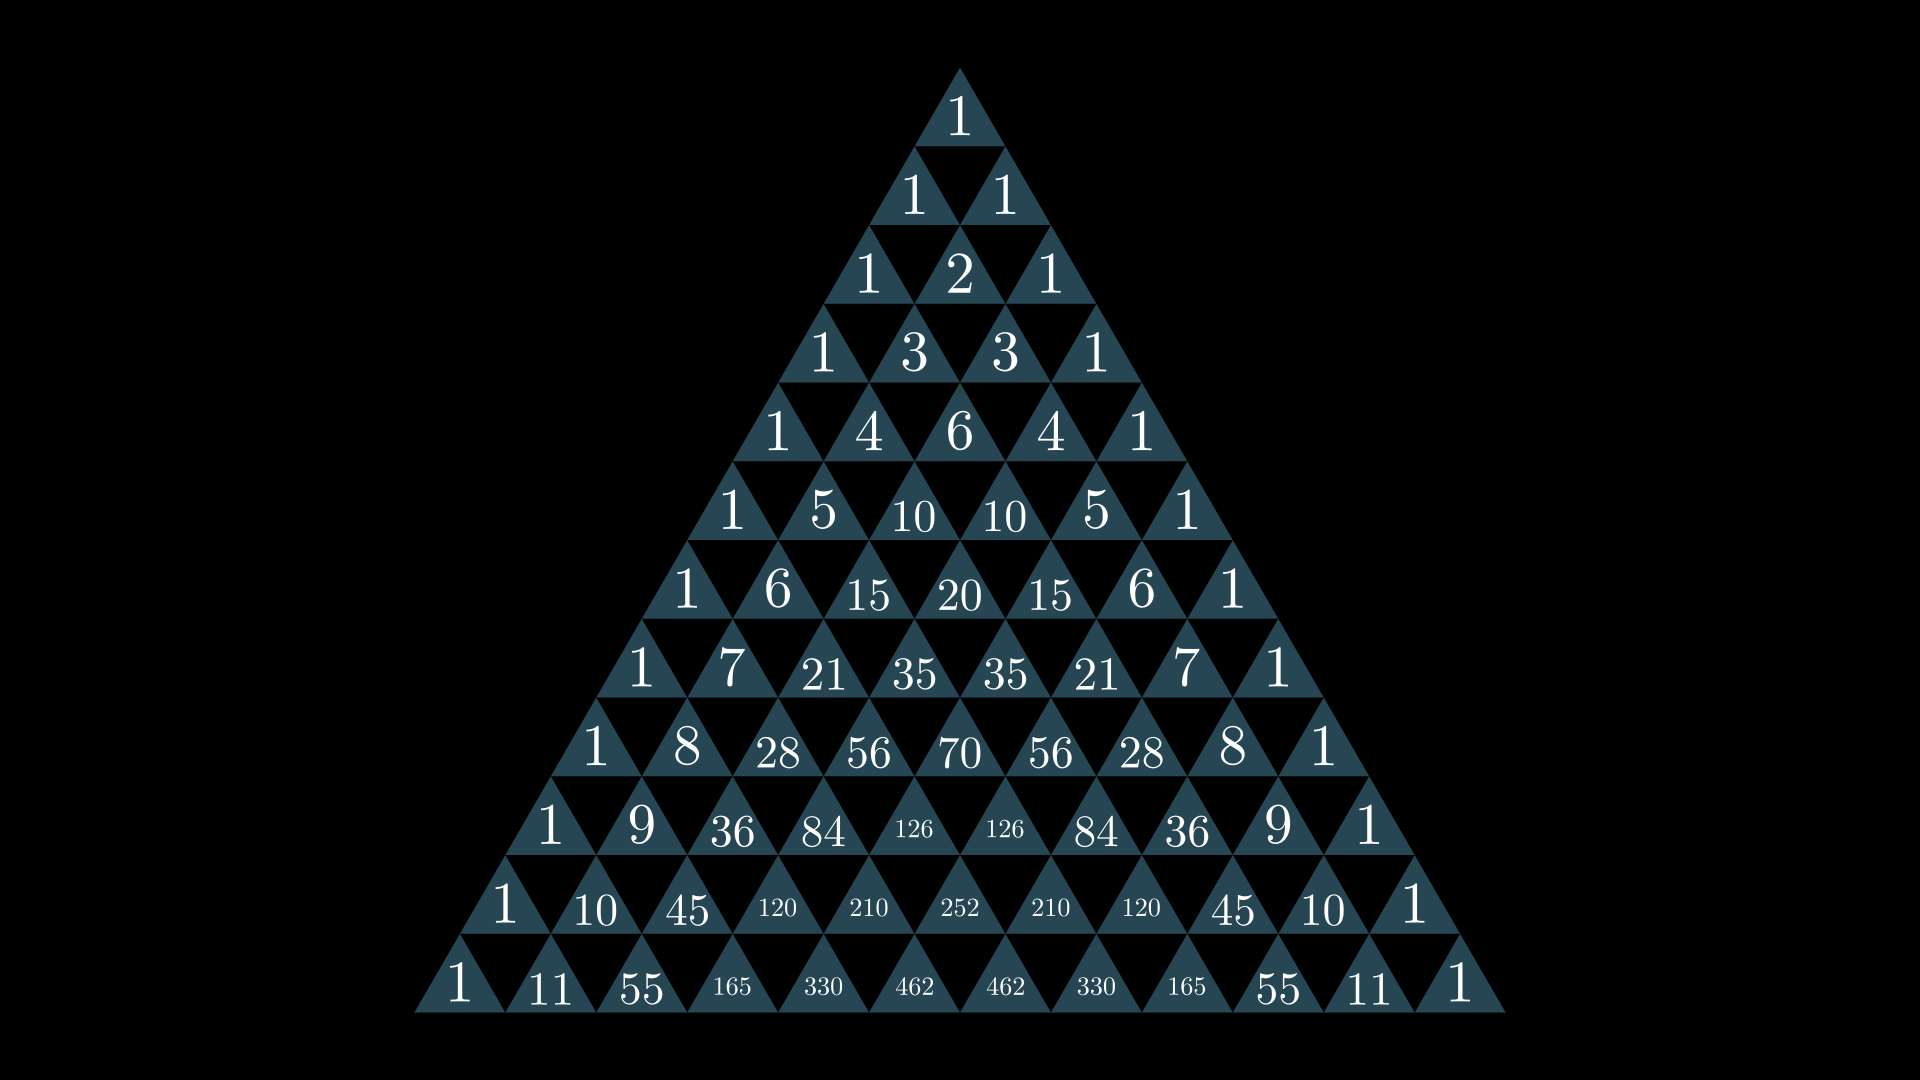

In [8]:
%%manim -qh -v CRITICAL pascal_printout
#used for the last scene

#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

#,fill_color = BLUE,fill_opacity=0.5
#COLOR_LIST = [GREY_D,BLUE,YELLOW,PURPLE,RED]
COLOR_LIST = THUMB_COLOR_LIST #['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']

####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
#my_n_rows = [2**4,3**3,2**5,2*5**2] #the places to zoom out to in the opening scene

n_rows = 12 #my_n_rows[-1]+26#add a few extra rows so that you can't see bottom of triangle

P_val = generate_pascals_triangle(n_rows+1)
#P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
P = [[None for i in range(n_rows)] for j in range(n_rows)]
P[0][0] = TRI[1].copy()
P[0][0].set_fill(COLOR_LIST[0],opacity=1.0)
P[0][0][1].color = WHITE
#STROKE_WIDTH = 1
#P[0][0][1].set_stroke(width=STROKE_WIDTH,color=BLACK)

w = P[0][0].width
h = P[0][0].height


P[0][0].to_edge(UP, buff=0.4*(8-6*h)) #set it so the first 6 rows will be vertically centered in the scene


x_init = P[0][0].get_x()
y_init = P[0][0].get_y()

text_vgroup = VGroup()
text_vgroup += P[0][0][1]



#create and add all of pascals triangle mobjects in P[n][k]
for n in range(1,n_rows):
    for k in range(n+1):
        #if n > 8:
        #    tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
        #else:
        tri = LabeledTriangle(str(P_val[n,k]),stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
        tri[1].color = WHITE
            #tri[1].set_stroke(width=STROKE_WIDTH,color=BLACK)
        text_vgroup += tri[1]
        P[n][k] = tri #TRI[int(P_val[n,k])].copy() #set the triangle
        P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
        P[n][k].set_y(y_init - h*n)
        

class pascal_printout(Scene):
    
    def construct(self):
        P_Group = VGroup()
        for n in range(n_rows):
            for k in range(n+1):
                P_Group.add(P[n][k])
                
        P_Group.height = 7
        P_Group.to_edge(UP)
        self.add(P_Group)

<string>:70: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:70: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


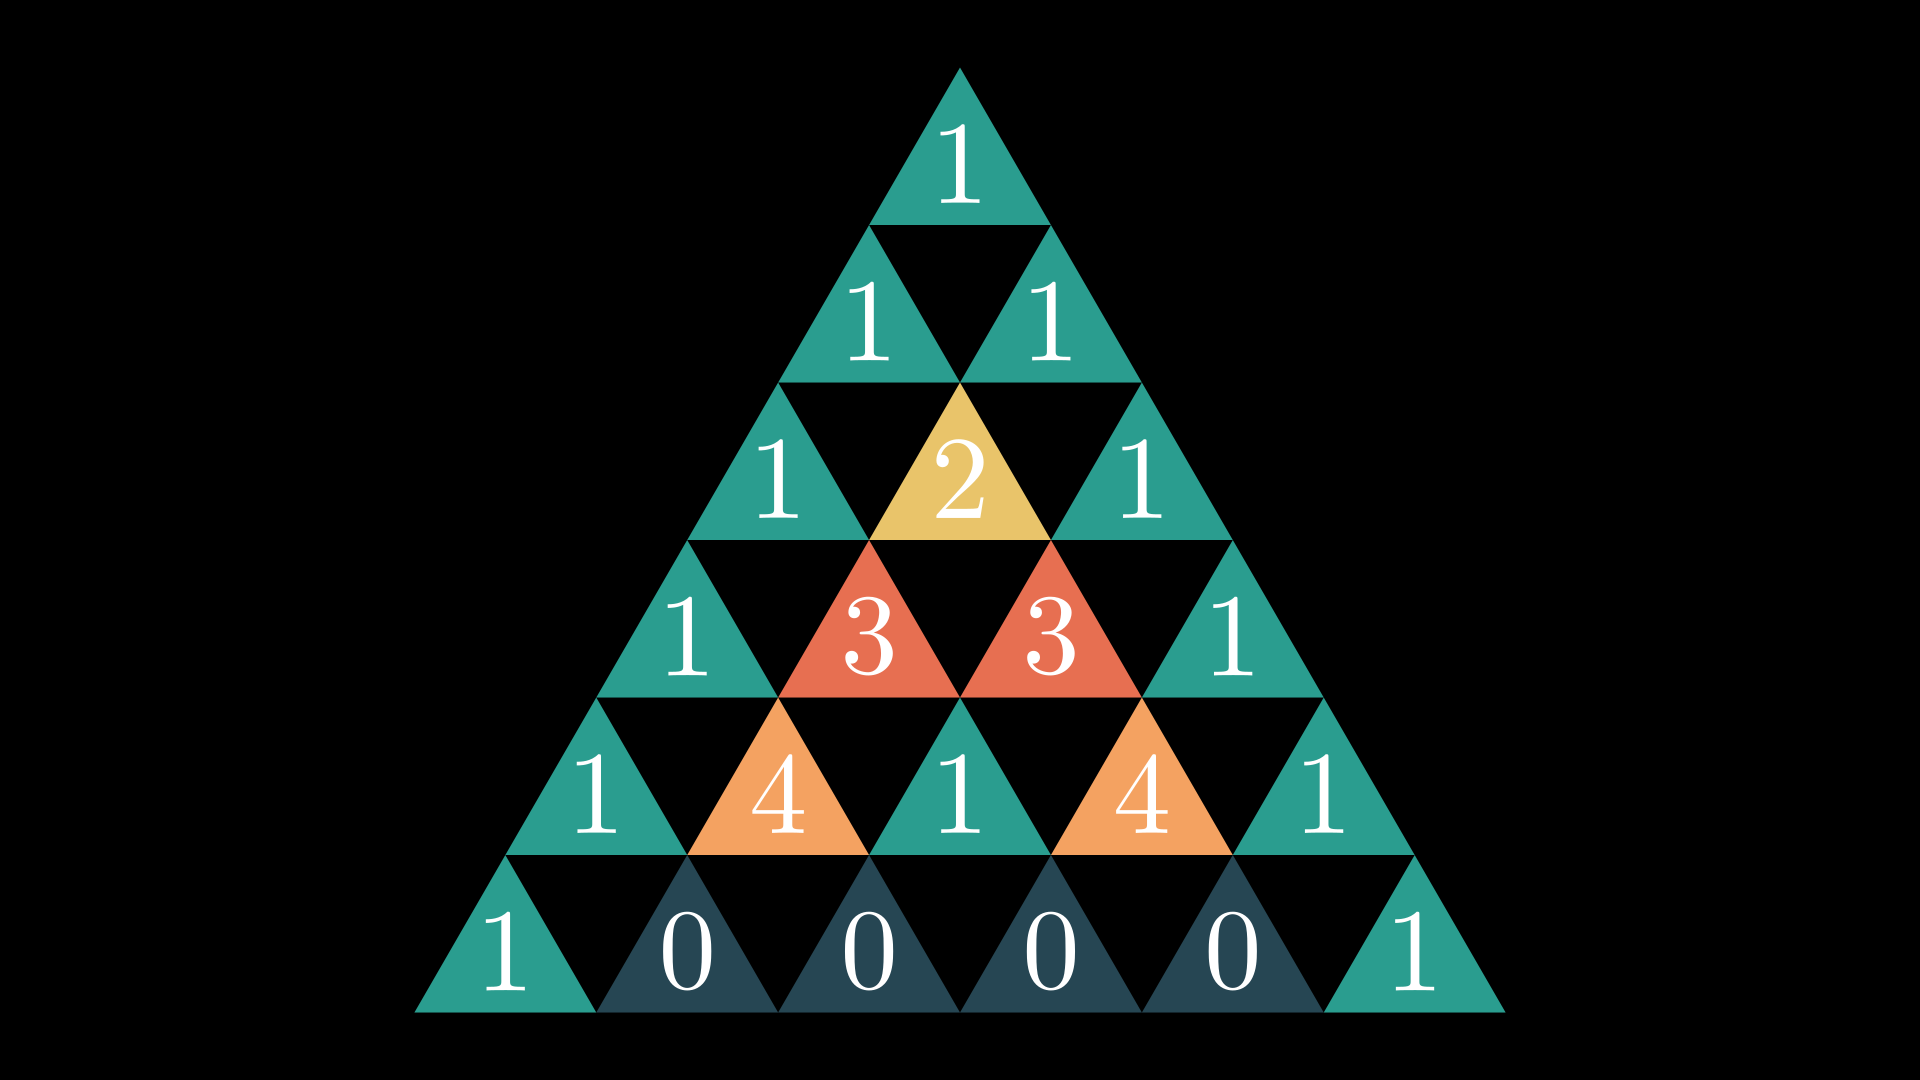

In [9]:
%%manim -qh -v CRITICAL pascal_printout_c

#used for the last scene

#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

#,fill_color = BLUE,fill_opacity=0.5
#COLOR_LIST = [GREY_D,BLUE,YELLOW,PURPLE,RED]
COLOR_LIST = THUMB_COLOR_LIST #['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']

####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
#my_n_rows = [2**4,3**3,2**5,2*5**2] #the places to zoom out to in the opening scene

n_rows = 6 #my_n_rows[-1]+26#add a few extra rows so that you can't see bottom of triangle

P_val = generate_pascals_triangle(n_rows+1)
#P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
P = [[None for i in range(n_rows)] for j in range(n_rows)]
P[0][0] = TRI[1].copy()
P[0][0].set_fill(COLOR_LIST[0],opacity=1.0)
P[0][0][1].color = WHITE
#STROKE_WIDTH = 1
#P[0][0][1].set_stroke(width=STROKE_WIDTH,color=BLACK)

w = P[0][0].width
h = P[0][0].height


P[0][0].to_edge(UP, buff=0.4*(8-6*h)) #set it so the first 6 rows will be vertically centered in the scene


x_init = P[0][0].get_x()
y_init = P[0][0].get_y()

text_vgroup = VGroup()
text_vgroup += P[0][0][1]



#create and add all of pascals triangle mobjects in P[n][k]
for n in range(1,n_rows):
    for k in range(n+1):
        #if n > 8:
        #    tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
        #else:
        tri = LabeledTriangle(str(P_val[n,k]),stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
        tri[1].color = WHITE
            #tri[1].set_stroke(width=STROKE_WIDTH,color=BLACK)
        text_vgroup += tri[1]
        P[n][k] = tri #TRI[int(P_val[n,k])].copy() #set the triangle
        P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
        P[n][k].set_y(y_init - h*n)
        

class pascal_printout_c(Scene):
    
    def construct(self):
        
        mod_k_color = 5
        
        for n in range(n_rows): #recolor 20% extra to make sure changes can't be seen in the zoom out later
                for k in range(n+1):
                    pass
                    P[n][k][0].set_fill(COLOR_LIST[P_val_5[n,k]],opacity=1.0)
                    temp = LabeledTriangle(label=str(P_val_5[n][k]))[1].scale(0.8)
                    temp.set_x(P[n][k][1].get_x())
                    temp.set_y(P[n][0][1].get_y())
                    temp.set_height(P[n][0][1].get_height())
                    
                    #temp.color = RED
                    P[n][k][1] = temp.copy()
                    
        P_Group = VGroup()
        for n in range(n_rows):
            for k in range(n+1):
                P_Group.add(P[n][k])
                
        P_Group.height = 7
        P_Group.to_edge(UP)
        self.add(P_Group)

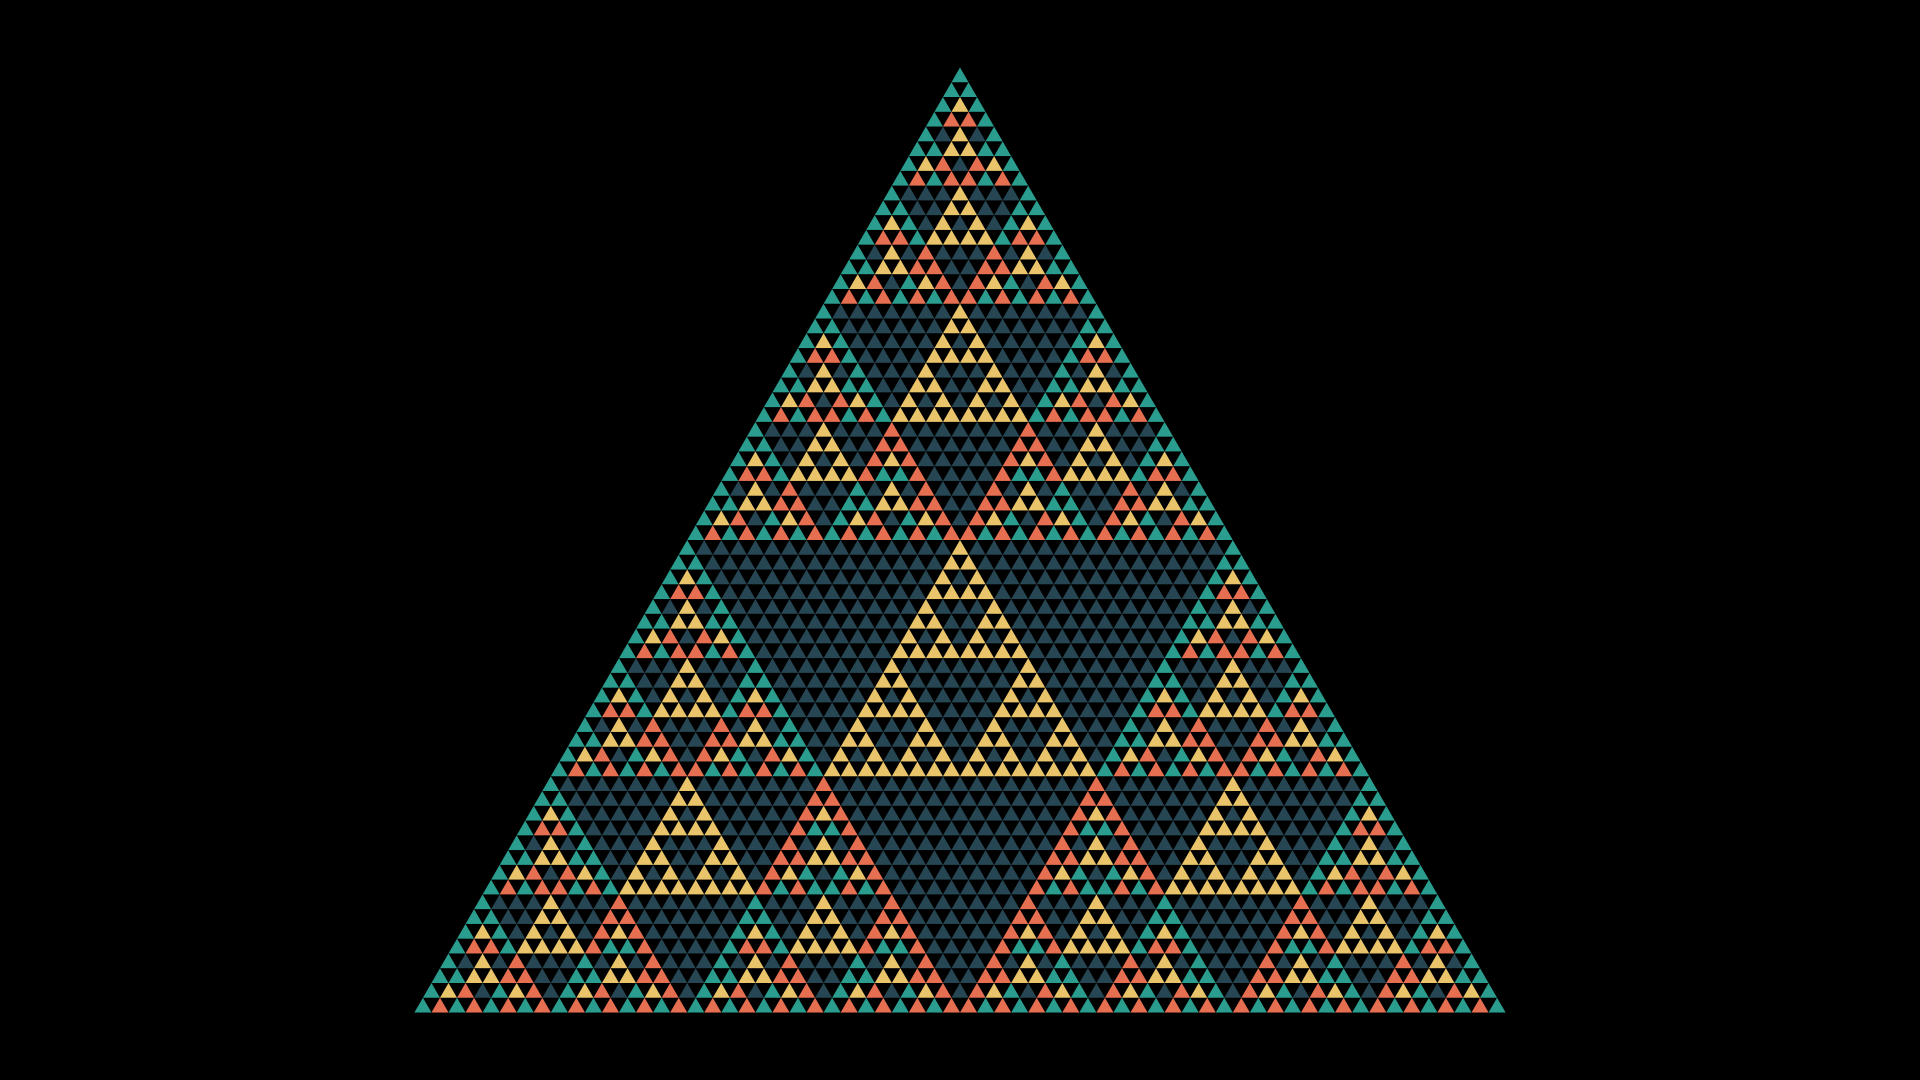

In [10]:
%%manim -qh -v CRITICAL pascal_printout_big

#used for the last scene

#--disable_caching tt_book
#note that without --disable_caching the voice_over service will have a bug!
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?

#,fill_color = BLUE,fill_opacity=0.5
#COLOR_LIST = [GREY_D,BLUE,YELLOW,PURPLE,RED]
COLOR_LIST = THUMB_COLOR_LIST #['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']
#COLOR_LIST = ['#001219','#EE9B00','#0A9396','#BB3E03','#94DB2','#9B2226']
####CREAT THE GLOBAL VARIABLE P FOR PASCALS TRIANGLE MOBJECTS
#my_n_rows = [2**4,3**3,2**5,2*5**2] #the places to zoom out to in the opening scene

n_rows = 4**3 #125 #my_n_rows[-1]+26#add a few extra rows so that you can't see bottom of triangle
mod_k = 4

#n_rows = 5**3 #
#mod_k = 5

#n_rows = 3**4 #
#mod_k = 3

#n_rows = 3*6**2 #
#mod_k = 6





######


P_val_k = generate_pascals_triangle(n_rows+1,mod_k=mod_k)
just_tri = Triangle(stroke_width=0).scale(0.8)
#P_val_mod_k = generate_pascals_triangle(n_rows+1,mod_k = 2) #this is used for very large values of n_rows
P = [[None for i in range(n_rows)] for j in range(n_rows)]
P[0][0] = just_tri.copy()
P[0][0].set_fill(COLOR_LIST[0],opacity=1.0)

#STROKE_WIDTH = 1
#P[0][0][1].set_stroke(width=STROKE_WIDTH,color=BLACK)

w = P[0][0].width
h = P[0][0].height


P[0][0].to_edge(UP, buff=0.4*(8-6*h)) #set it so the first 6 rows will be vertically centered in the scene


x_init = P[0][0].get_x()
y_init = P[0][0].get_y()


#create and add all of pascals triangle mobjects in P[n][k]
for n in range(n_rows):
    #print(n)
    for k in range(n+1):
        #if n > 8:
        #    tri = EMPTY_TRI.copy() #LabeledTriangle(str(P_val[n,k]),color=WHITE).scale(0.8)
        #else: #LabeledTriangle(str(P_val[n,k]),stroke_width=0).scale(0.8) #TRI[P_val[n,k]].copy()
        #tri[1].color = WHITE
            #tri[1].set_stroke(width=STROKE_WIDTH,color=BLACK)
        #text_vgroup += tri[1]
        P[n][k] = just_tri.copy() #TRI[int(P_val[n,k])].copy() #set the triangle
        P[n][k].set_fill(COLOR_LIST[P_val_k[n,k]],opacity=1.0)
        P[n][k].set_x(x_init + w*(k-0.5*n)) #set the position
        P[n][k].set_y(y_init - h*n)
        

        
class pascal_printout_big(Scene):
    
    def construct(self):
        P_Group = VGroup()
        for n in range(n_rows):
            for k in range(n+1):
                P_Group.add(P[n][k])
                
        P_Group.height = 7
        P_Group.to_edge(UP)
        self.add(P_Group)